In [18]:
from binance.client import Client
import pandas as pd
import dateutil.parser
import matplotlib.pyplot as plt

# Ваши ключи API
api_key = 'd1HfNZ4FwkWzXzG7rL0fZeuXxHsIggkXTMWBHcj9MZRCatJefwXHJ3sjdCjQ3jCN'
api_secret = 'igwrAhbRiYDWdMkm5wHybaCpuanCyqOoqrD3XOPL31IhqAlpTxnbvKr7seKEqFdH'

client = Client(api_key, api_secret)

symbol = 'ETHUSDT'
interval = Client.KLINE_INTERVAL_1MINUTE

start_str = '2022-05-16 19:00:00'
end_str = '2022-5-17 06:00:00'

start_ts = int(dateutil.parser.parse(start_str).timestamp() * 1000)
end_ts = int(dateutil.parser.parse(end_str).timestamp() * 1000)

klines = client.get_historical_klines(symbol, interval, start_str, end_str)

# Преобразовать данные в DataFrame
df = pd.DataFrame(klines, columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')





In [21]:
df.shape

(661, 12)

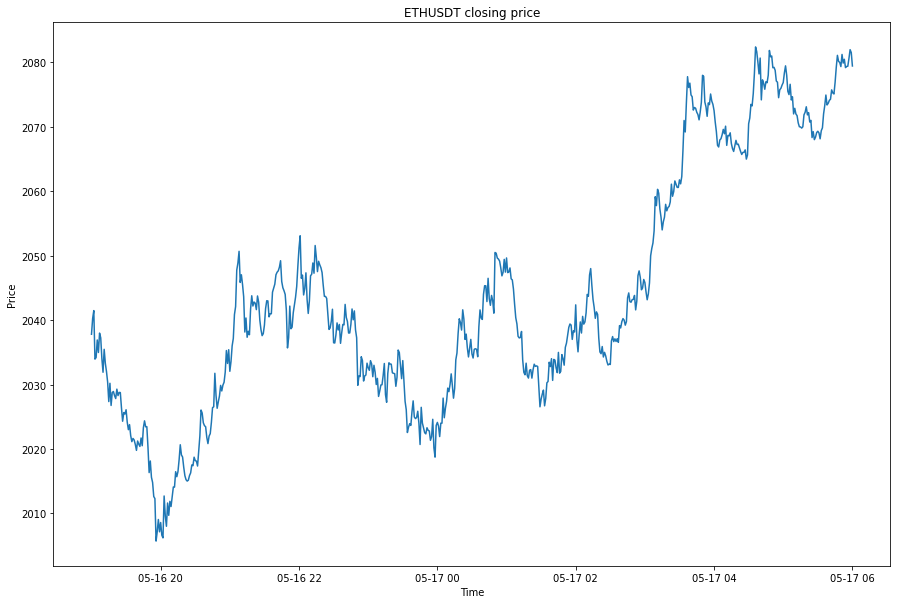

In [19]:
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close'] = pd.to_numeric(df['close'])
SLICE = 9000
# Построить график
plt.figure(figsize=(15, 10))
plt.plot(df['open_time'], df['close'])
plt.title(f'{symbol} closing price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()